Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../data/v4/Handballprojekt_1Liga fertig.xlsx")

file.sheet_names

df = file.parse('1. Liga')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]


/Users/nayansavaliya/Desktop/HandballGameAnalysis/hba-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','playTime',
              'homeGoals','opponentGoals','throwSuccess','whistleThrowTime',
              'LRHandy','throwDirection','goalKeeperPosition',
              'goalKeeperName', 'goalKeeperHeightCM','shooterheightCM',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16','goalKeeperName':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16' })
df.head()

,homeTeam,opponentTeam,day,name,playTime,homeGoals,opponentGoals,throwSuccess,whistleThrowTime,LRHandy,throwDirection,goalKeeperPosition,goalKeeperName,goalKeeperHeightCM,shooterheightCM,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,19.0,9.0,9.0,1.0,18.0,2.0,7.0,1.0,Heinevetter,194.0,186.0,0.0,1.0,NaN,NaN
1,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,32.0,17.0,16.0,1.0,20.0,2.0,9.0,1.0,Heinevedtter,194.0,186.0,0.0,2.0,7.0,1.0
2,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,40.0,22.0,18.0,1.0,44.0,2.0,8.0,1.0,Vujovic,196.0,186.0,1.0,3.0,9.0,1.0
3,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,46.0,27.0,22.0,0.0,21.0,2.0,4.0,1.0,Vujovic,196.0,186.0,0.0,4.0,8.0,1.0
4,Rhein-Neckar Löwen,SC Magdeburg,2.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


Teamwise Throw stats

                 homeTeam  TotatlThrows  SuccessfulThrows  FailedThrows  \
1   FRISCH AUF! Göppingen            15                14             1   
11          TuS N-Lübecke            12                11             1   
0           Bergischer HC            11                10             1   
4             HC Erlangen             7                 6             1   
2           Füchse Berlin            61                52             4   
7            SC Magdeburg            96                75            21   
10     TVB 1898 Stuttgart            15                11             3   
9   TSV Hannover Burgdorf            11                 8             2   
3              GWD Minden             9                 6             2   
8                THW Kiel            47                30             7   
6            MT Melsungen             4                 2             1   
5             HSG Wetzlar             6                 2             3   

    successPercentage  


[Text(0, 0, '33.3333'),
 Text(0, 0, '50'),
 Text(0, 0, '63.8298'),
 Text(0, 0, '66.6667'),
 Text(0, 0, '72.7273'),
 Text(0, 0, '73.3333'),
 Text(0, 0, '78.125'),
 Text(0, 0, '85.2459'),
 Text(0, 0, '85.7143'),
 Text(0, 0, '90.9091'),
 Text(0, 0, '91.6667'),
 Text(0, 0, '93.3333')]

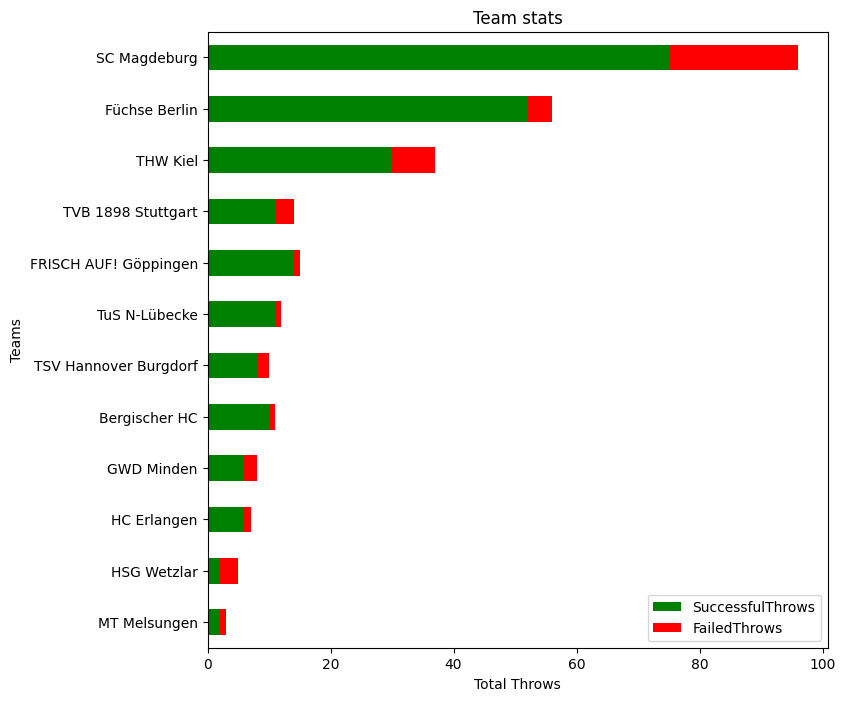

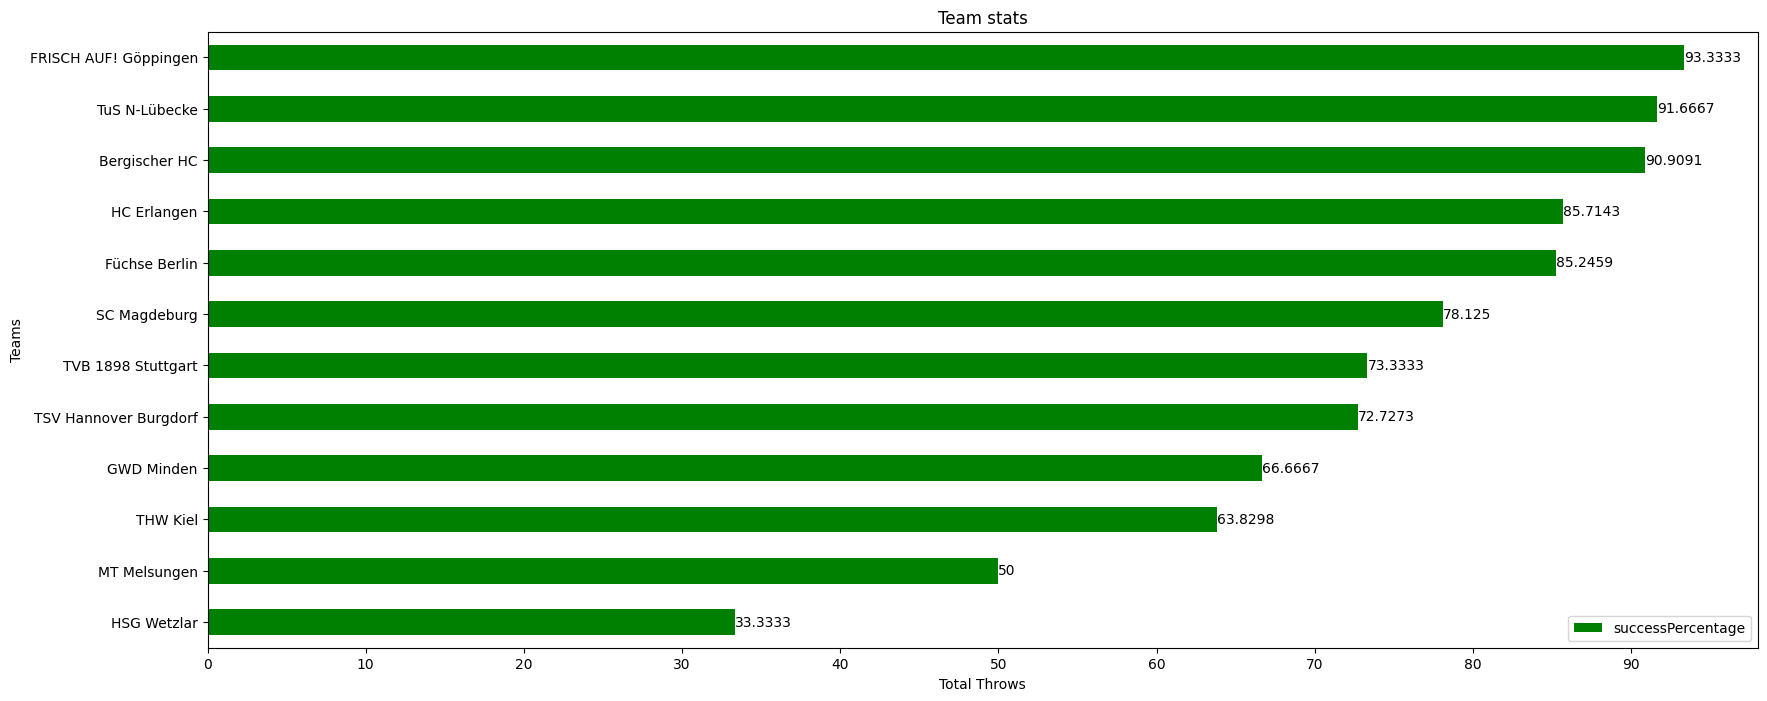

In [4]:
# Teamwise Throw stats
df2 = df.groupby(['homeTeam'])['homeTeam'].count().reset_index(name='TotatlThrows')
df3 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df3 = df3.groupby(['homeTeam'])['homeTeam'].count().reset_index(name="SuccessfulThrows")
df4 = df.loc[(df.throwSuccess == 0)]
df4 = df4.groupby(['homeTeam'])['homeTeam'].count().reset_index(name="FailedThrows")
df5 = pd.merge(df2,df3,on='homeTeam')
df5 = pd.merge(df5,df4,on='homeTeam')
df5['successPercentage'] = (df5['SuccessfulThrows']/df5['TotatlThrows'])*100
print(df5.sort_values('successPercentage',ascending=False))
df5.sort_values('TotatlThrows',ascending=True).set_index('homeTeam')[['SuccessfulThrows','FailedThrows']].plot.barh(stacked=True, title='Team stats',color=("green", "red"),xlabel='Total Throws', ylabel='Teams',figsize=(8,8) )

ax = df5.sort_values('successPercentage',ascending=True).set_index('homeTeam')[['successPercentage']].plot.barh( title='Team stats',color=("green", "red"),xlabel='Total Throws', ylabel='Teams',figsize=(20,8),xticks=range(0,100,10) )
ax.bar_label(ax.containers[0])

Team & player wise Throw stats

In [5]:
# Team & player wise Throw stats
df6 = df.groupby(['homeTeam','name'])['name'].count().reset_index(name='TotatlThrows')
df7 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df7 = df7.groupby(['homeTeam','name'])['name'].count().reset_index(name="SuccessfulThrows")
df8 = df.loc[(df.throwSuccess == 0)]
df8 = df8.groupby(['homeTeam','name'])['name'].count().reset_index(name="FailedThrows")
df9 = df6.merge(df7,left_on=['homeTeam','name'],right_on=['homeTeam','name'],  how='left')
df9 = df9.merge(df8,left_on=['homeTeam','name'],right_on=['homeTeam','name'],  how='left')
df9.replace(np.nan, 0.0, inplace=True)
#df9.drop(columns=['homeTeam_x','homeTeam_y'])
df9['successPercentage'] = (df9['SuccessfulThrows']/df9['TotatlThrows'])*100
df9.sort_values('name',ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df9.sort_values('name',ascending=False))

,homeTeam,name,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
40,TuS N-Lübecke,Magnusson,3,3.0,0.0,100.000000
37,TVB 1898 Stuttgart,Magnusson,9,7.0,2.0,77.777778
28,SC Magdeburg,Magnusson,85,65.0,20.0,76.470588
25,SC DHfK Leipzig,Magnusson,6,6.0,0.0,100.000000
19,Handball Sport Verein Hamburg,Magnusson,3,3.0,0.0,100.000000
17,HSG Wetzlar,Magnusson,3,1.0,2.0,33.333333
35,TSV Hannover Burgdorf,Magnusson,3,1.0,2.0,33.333333
31,TBV Lemgo Lippe,Magnusson,6,6.0,0.0,100.000000
12,HBW Balingen-Weilstetten,Magnusson,2,2.0,0.0,100.000000
15,HC Erlangen,Magnusson,4,4.0,0.0,100.000000


Player wise Throw stats

,name,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
1,Lindberg,95,89,6,93.684211
0,Eckberg,81,66,14,81.481481
2,Magnusson,135,108,27,80.000000


<AxesSubplot: title={'center': 'Player stats'}, xlabel='Total Throws', ylabel='Player'>

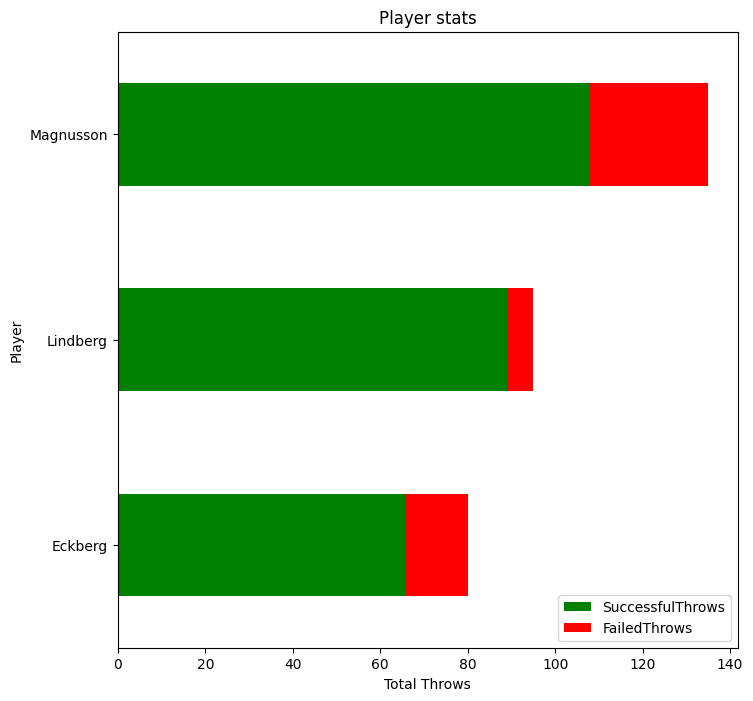

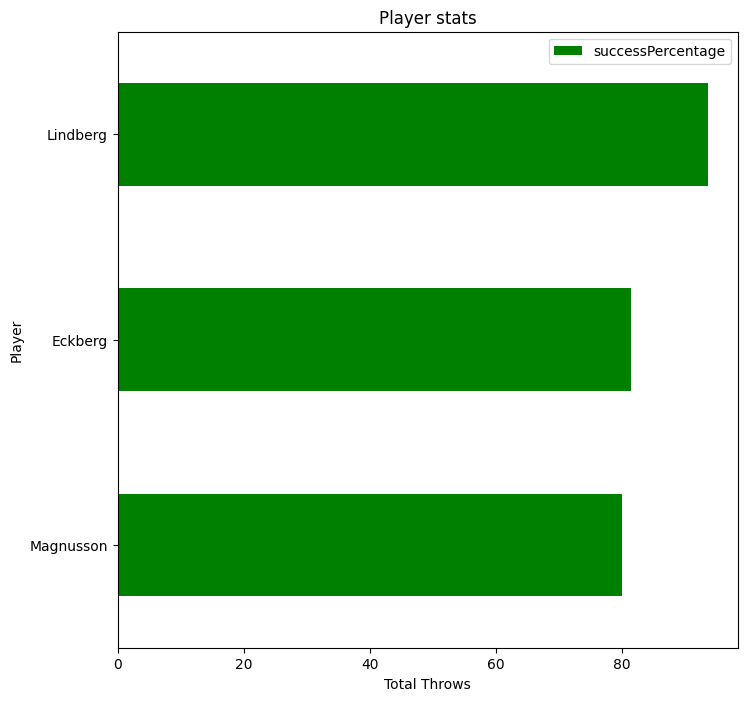

In [6]:
# Player wise Throw stats
df10 = df.groupby(['name'])['name'].count().reset_index(name='TotatlThrows')
df11 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df11 = df11.groupby(['name'])['name'].count().reset_index(name="SuccessfulThrows")
df12 = df.loc[(df.throwSuccess == 0)]
df12 = df12.groupby(['name'])['name'].count().reset_index(name="FailedThrows")
df13 = pd.merge(df10,df11,on=['name'])
df13 = pd.merge(df13,df12,on=['name'])
df13.replace(np.nan, 0.0, inplace=True)
#df9.drop(columns=['homeTeam_x','homeTeam_y'])
df13['successPercentage'] = (df13['SuccessfulThrows']/df13['TotatlThrows'])*100
df13.sort_values('name',ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df13.sort_values('successPercentage',ascending=False))
    
df13.set_index('name')[['SuccessfulThrows','FailedThrows']].plot.barh(stacked=True, title='Player stats',color=("green", "red"),xlabel='Total Throws', ylabel='Player',figsize=(8,8) )

df13.sort_values('successPercentage',ascending=True).set_index('name')[['successPercentage']].plot.barh( title='Player stats',color=("green", "red"),xlabel='Total Throws', ylabel='Player',figsize=(8,8) )

Throw Success based on lastTrow Success

234
bothSuccess: 169
bothFailed: 2
failedButLastSuccess: 35
successButLastFailed: 28
------------------------------
bothNachwurf: 0
successLastNachwurf: 1
failedLastNachwurf: 1


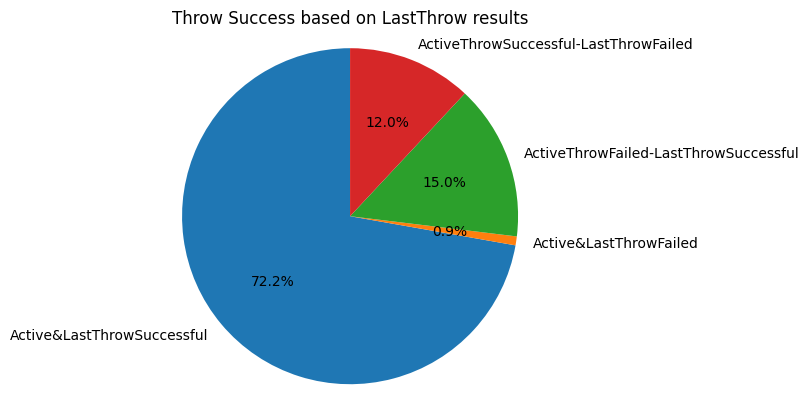

In [7]:
df14 = df.loc[:,('throwSuccess','lastThrowSuccess')]
df14.dropna(inplace=True)
df14.replace(to_replace=2.0, value=1.0, inplace=True)
print(df14.count()[0])
bothSuccess = df14[(df14.throwSuccess == 1) & (df14.lastThrowSuccess == 1)].count()[0]
print('bothSuccess: '+ str(bothSuccess))
bothFailed = df14[(df14.throwSuccess == 0) & (df14.lastThrowSuccess == 0)].count()[0]
print('bothFailed: '+ str(bothFailed))
failedButLastSuccess = df14[(df14.throwSuccess == 0) & (df14.lastThrowSuccess == 1)].count()[0]
print('failedButLastSuccess: '+ str(failedButLastSuccess))    
successButLastFailed = df14[(df14.throwSuccess == 1) & (df14.lastThrowSuccess == 0)].count()[0] 
print('successButLastFailed: '+ str(successButLastFailed)) 

print('------------------------------')
df15 = df.loc[:,('throwSuccess','lastThrowSuccess')]
df15.dropna(inplace=True)
bothNachwurf = df15[(df15.throwSuccess == 2) & (df15.lastThrowSuccess == 2)].count()[0]
print('bothNachwurf: '+ str(bothNachwurf))
successLastNachwurf = df15[(df15.throwSuccess == 1) & (df15.lastThrowSuccess == 2)].count()[0]
print('successLastNachwurf: '+ str(successLastNachwurf))
failedLastNachwurf = df15[(df15.throwSuccess == 0) & (df15.lastThrowSuccess == 2)].count()[0]
print('failedLastNachwurf: '+ str(failedLastNachwurf))

labels = ['Active&LastThrowSuccessful','Active&LastThrowFailed','ActiveThrowFailed-LastThrowSuccessful','ActiveThrowSuccessful-LastThrowFailed']
values = [bothSuccess,bothFailed,failedButLastSuccess,successButLastFailed]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Throw Success based on LastThrow results')
plt.show()

Throw analysis fo L-R players

In [8]:
df15 = df.loc[:,('throwSuccess','LRHandy')]
df15.dropna(inplace=True)
df15['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)
noOfThrowsFromR = df15[ (df15.LRHandy == 1)].count()[0]
print('noOfThrowsFromR: '+ str(noOfThrowsFromR))
noOfThrowsFromL = df15[ (df15.LRHandy == 2)].count()[0]
print('noOfThrowsFromL: '+ str(noOfThrowsFromL)),

print('------------------')

successR = df15[(df15.throwSuccess == 1) & (df15.LRHandy == 1)].count()[0]
print('successR: '+ str(successR))

successL = df15[(df15.throwSuccess == 1) & (df15.LRHandy == 2)].count()[0]
print('successL: '+ str(successL))

failedR = df15[(df15.throwSuccess == 0) & (df15.LRHandy == 1)].count()[0]
print('failedR: '+ str(failedR))

failedL = df15[(df15.throwSuccess == 0) & (df15.LRHandy == 2)].count()[0]
print('failedL: '+ str(failedL))


print('----------------------')
print('%successR: '+ str((successR/noOfThrowsFromR)*100))
print('%successL: '+ str((successL/noOfThrowsFromL)*100))



noOfThrowsFromR: 0
noOfThrowsFromL: 310
------------------
successR: 0
successL: 263
failedR: 0
failedL: 47
----------------------
%successR: nan
%successL: 84.83870967741936


/var/folders/zq/n748bt1s4fdbgrfv7nj7s2n80000gn/T/ipykernel_17737/287796995.py:25: RuntimeWarning: invalid value encountered in long_scalars
  print('%successR: '+ str((successR/noOfThrowsFromR)*100))


Throw Analysis based on pressure situation

                                    pressureSituation  throwSuccess  Count
0                               No Pressure Situation           0.0     32
1                               No Pressure Situation           1.0    179
2                                    GoalKeeperChange           0.0      8
3                                    GoalKeeperChange           1.0     36
4                                     LastThrowFailed           0.0      2
5                                     LastThrowFailed           1.0     24
6                  GoalDiffLessEqualTo4After50MinPlay           0.0      3
7                  GoalDiffLessEqualTo4After50MinPlay           1.0     16
8                    GoalKeeperChange-LastThrowFailed           0.0      1
9                    GoalKeeperChange-LastThrowFailed           1.0      1
10  GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...           1.0      3
11  LastThrowFailed-GoalDiffLessEqualTo4After50Min...           1.0      2
12  GoalKeeperChange-Last

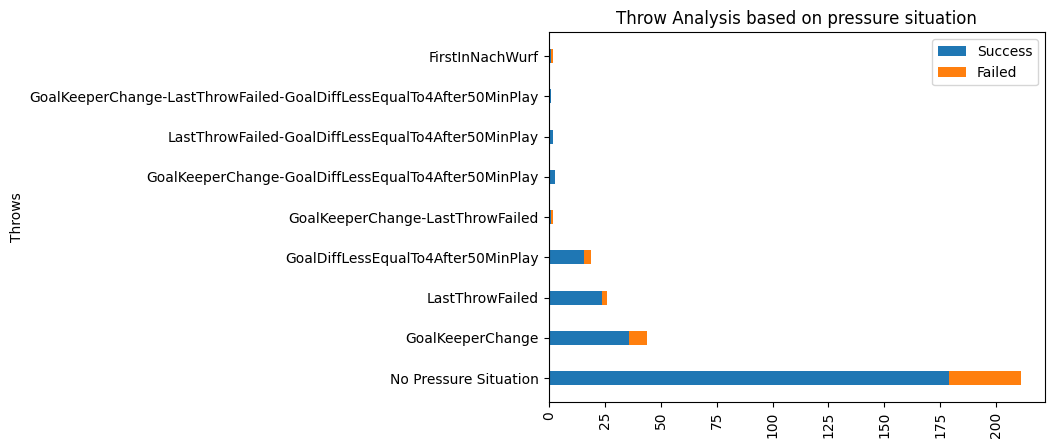

In [9]:
df16 = df.loc[:,('pressureSituation','throwSuccess')]
df16['throwSuccess'].replace(2,1, inplace=True)
df16.dropna(inplace=True)
df16 = df16.groupby(['pressureSituation','throwSuccess'])['throwSuccess'].count().reset_index(name='Count')
df16

X = ['No Pressure Situation','GoalKeeperChange','LastThrowFailed',
     'GoalDiffLessEqualTo4After50MinPlay','GoalKeeperChange-LastThrowFailed',
     'GoalKeeperChange-GoalDiffLessEqualTo4After50MinPlay','LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'GoalKeeperChange-LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'FirstInNachWurf']

for val in df16['pressureSituation']:
     df16['pressureSituation'].replace(val,X[int(val)], inplace=True)


print(df16)
grp = df16['pressureSituation'].unique()
s = list()
for g in grp:
     tempdf = df16[(df16.pressureSituation == g) & (df16.throwSuccess == 1.0)]
     if tempdf.empty:
          s.append(0.0)
     else:
          s.append(tempdf.iloc[0,2])
f = list()
for g in grp:
     tempdf = df16[(df16.pressureSituation == g) & (df16.throwSuccess == 0.0)]
     if tempdf.empty:
          f.append(0)
     else:
          f.append(tempdf.iloc[0,2])
t = list()
for g in grp:
     t.append(df16[(df16.pressureSituation == g)]['Count'].sum())


width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(grp, s, width,  label='Success')
ax.barh(grp, f, width,  left=s,
       label='Failed')

ax.set_ylabel('Throws')
#ax.set_xscale('log')
ax.set_title('Throw Analysis based on pressure situation')
ax.legend()
plt.xticks(rotation=90)
plt.show()

                                   PressureSituation  successPercentage
0                              No Pressure Situation          84.834123
1                                   GoalKeeperChange          81.818182
2                                    LastThrowFailed          92.307692
3                 GoalDiffLessEqualTo4After50MinPlay          84.210526
4                   GoalKeeperChange-LastThrowFailed          50.000000
5  GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...         100.000000
6  LastThrowFailed-GoalDiffLessEqualTo4After50Min...         100.000000
7  GoalKeeperChange-LastThrowFailed-GoalDiffLessE...         100.000000
8                                    FirstInNachWurf          50.000000


[Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '81.8182'),
 Text(0, 0, '84.2105'),
 Text(0, 0, '84.8341'),
 Text(0, 0, '92.3077'),
 Text(0, 0, '100'),
 Text(0, 0, '100'),
 Text(0, 0, '100')]

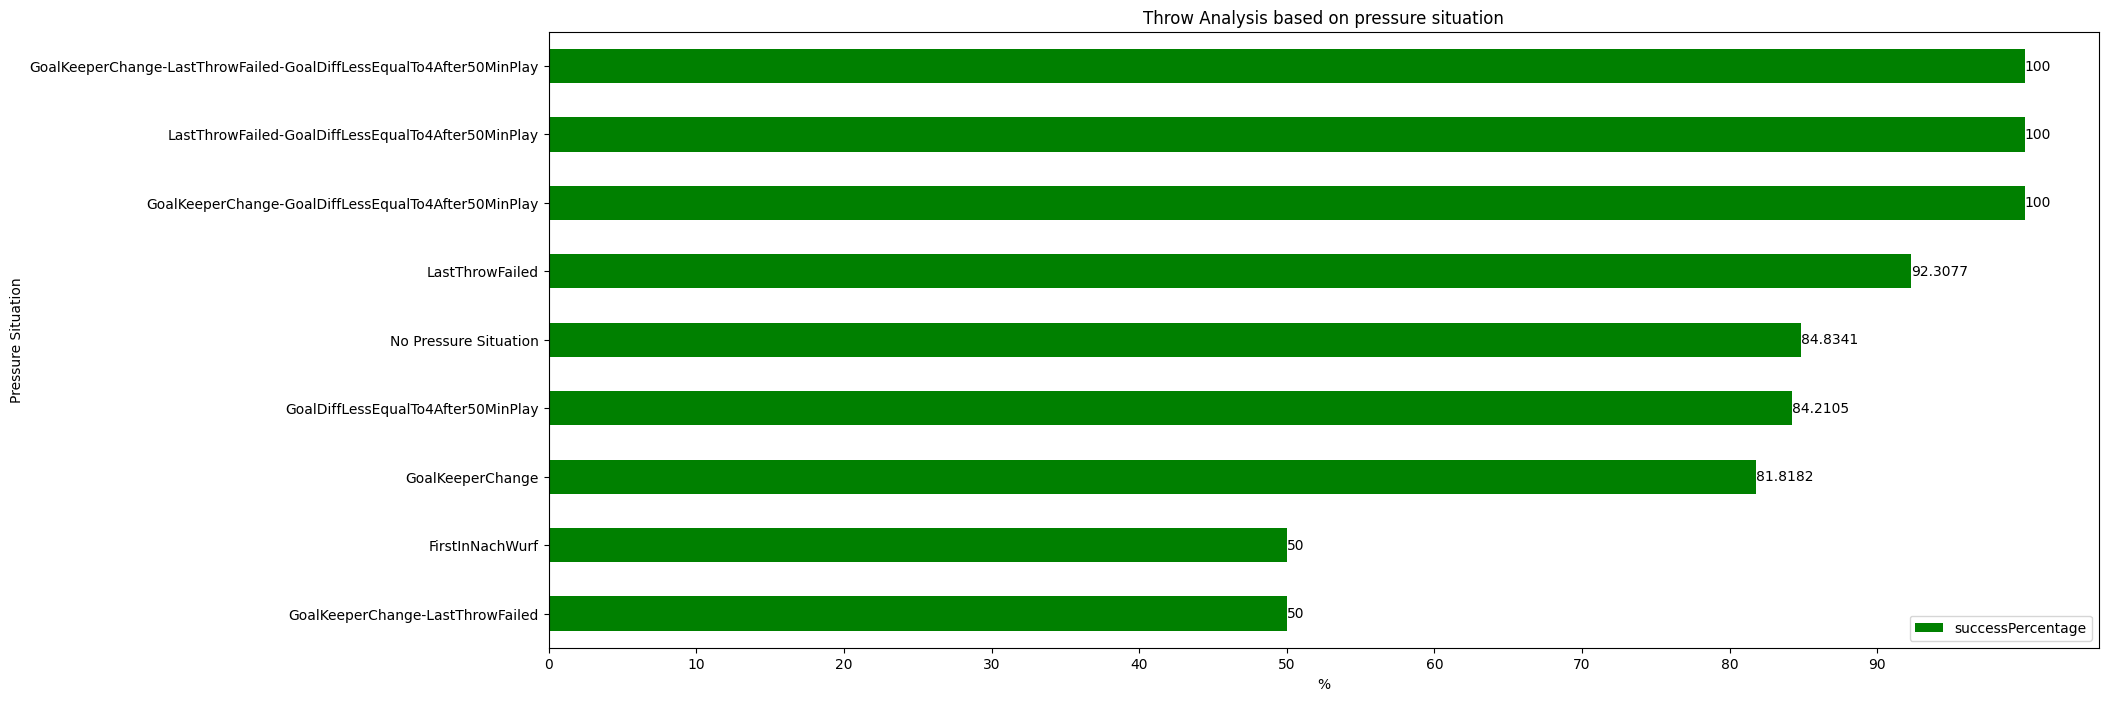

In [10]:

pressureSituation = pd.DataFrame({'PressureSituation':grp,'successPercentage':[(se/te)*100 for se, te in zip(s, t)]})
print(pressureSituation)
ax = pressureSituation.sort_values('successPercentage',ascending=True).set_index('PressureSituation')[['successPercentage']].plot.barh( title='Throw Analysis based on pressure situation',color=("green", "red"),xlabel='%', ylabel='Pressure Situation',figsize=(20,8),xticks=range(0,100,10) )
ax.bar_label(ax.containers[0])

Throw Direction

,throwDirection,throwSuccess,Count
0,1.0,0.0,5
1,1.0,1.0,50
2,2.0,0.0,2
3,2.0,1.0,5
4,3.0,0.0,7
5,3.0,1.0,31
6,4.0,0.0,4
7,4.0,1.0,9
8,5.0,1.0,2
9,6.0,0.0,1


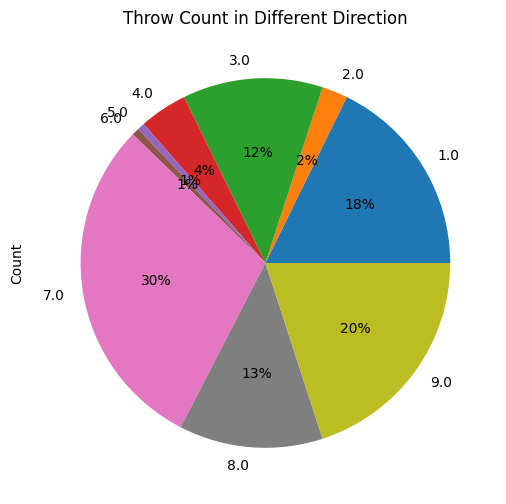

In [11]:


df17 = df.loc[:,('throwDirection','throwSuccess')]
df17.dropna(inplace=True)
df17['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)
df18 = df17.copy()
df18 = df18.groupby(['throwDirection'])['throwSuccess'].count().reset_index(name='Count')
df18.set_index('throwDirection').plot.pie(y='Count', figsize=(6, 6), title='Throw Count in Different Direction',autopct='%.0f%%',legend=None)
df17 = df17.groupby(['throwDirection','throwSuccess'])['throwSuccess'].count().reset_index(name='Count')
df17.sort_values(['throwDirection'],ascending=True,inplace=True)
df17

Text(0.5, 1.0, '9')

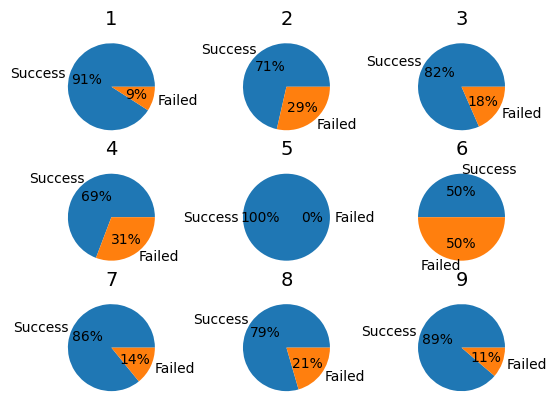

In [12]:
# Some data
labels = 'Success', 'Failed'

# Make figure and axes
fig, axs = plt.subplots(3, 3)

axs[0, 0].pie([50,5], labels=labels, autopct='%.0f%%' )
axs[0, 0].set_title('1', fontsize=14)
axs[0, 1].pie([5,2], labels=labels, autopct='%.0f%%')
axs[0, 1].set_title('2', fontsize=14)
axs[0, 2].pie([31,7], labels=labels,  autopct='%.0f%%')
axs[0, 2].set_title('3', fontsize=14)

axs[1, 0].pie([9,4], labels=labels, autopct='%.0f%%')
axs[1, 0].set_title('4', fontsize=14)
axs[1, 1].pie([2,0], labels=labels,  autopct='%.0f%%')
axs[1, 1].set_title('5', fontsize=14)
axs[1, 2].pie([1,1], labels=labels, autopct='%.0f%%')
axs[1, 2].set_title('6', fontsize=14)

axs[2, 0].pie([79,13], labels=labels,  autopct='%.0f%%')
axs[2, 0].set_title('7', fontsize=14)
axs[2, 1].pie([31,8], labels=labels, autopct='%.0f%%')
axs[2, 1].set_title('8', fontsize=14)
axs[2, 2].pie([55,7], labels=labels,  autopct='%.0f%%')
axs[2, 2].set_title('9', fontsize=14)
